# Analisis de framing para bases de datos

In [195]:
# Librerías a utilizar

# Análisis de datos
import pandas as pd
pd.options.display.max_columns = None
import re
import numpy as np
import seaborn as sns
import networkx as nx
import matplotlib.pyplot as plt
import json
import ast

# Análisis de contenido 
import spacy
# !python -m spacy download es_core_news_md  # Modelo mediano (recomendado) (de preferencia instalar en terminal)
# Carga el modelo en español
nlp = spacy.load("es_core_news_md")
from collections import Counter
from transformers import pipeline


In [ ]:
# Cargando las cuatro bases de datos con solo las columnas necesarias y en el orden correcto
columnas_deseadas = ["titulo", "articulo", "url", "fecha", "analisis", "sentimiento"]

# La Voz del Sur
la_voz_del_sur = pd.read_csv('analisis/analisis_vozdelsur.csv', usecols=columnas_deseadas)[columnas_deseadas]
# Letra Fría
letra_fria = pd.read_csv('analisis/analisis_letrafria.csv', usecols=columnas_deseadas)[columnas_deseadas]

# Al Calor Político
al_calor_politico = pd.read_csv('analisis/analisis_alcalorpolitico.csv', usecols=columnas_deseadas)[columnas_deseadas]
# Plumas Libres
plumas_libres = pd.read_csv('analisis/analisis_plumaslibres.csv', usecols=columnas_deseadas)[columnas_deseadas]

# Añadir columna 'medio' a cada DataFrame
la_voz_del_sur['medio'] = 'La Voz del Sur'
letra_fria['medio'] = 'Letra Fría'
al_calor_politico['medio'] = 'Al Calor Político'
plumas_libres['medio'] = 'Plumas Libres'


# Combinar los DataFrames
df = pd.concat([
    la_voz_del_sur,
    letra_fria,
    al_calor_politico,
    plumas_libres
], ignore_index=True)

# Convertir la columna 'analisis' de string a diccionario
df['analisis'] = df['analisis'].apply(ast.literal_eval)

# Verificar
print(df['medio'].value_counts())

medio
Al Calor Político    1344
La Voz del Sur       1056
Letra Fría            602
Plumas Libres         458
Name: count, dtype: int64


In [197]:
df

,titulo,articulo,url,fecha,analisis,sentimiento,medio
0,Dan Banderazo de Arranque al Operativo de Sema...,*Autoridades de los tres niveles de gobierno t...,https://www.lavozdelsur.com.mx/dan-banderazo-d...,"abril 12th, 2025","{'entidades': [('UEPCBJ', 'ORG'), ('Puesto de ...",NEU,La Voz del Sur
1,La Falta de Vigilancia en las Carreteras,"Sin duda alguna, los recientes cierres en las ...",https://www.lavozdelsur.com.mx/la-falta-de-vig...,"abril 11th, 2025","{'entidades': [('Sur de Jalisco', 'LOC'), ('Se...",NEG,La Voz del Sur
2,Banda Real de la Montaña Lleva su Música al Fe...,Las potentes y muy alegres notas del estilo mu...,https://www.lavozdelsur.com.mx/banda-real-de-l...,"abril 11th, 2025","{'entidades': [('Minatitlán', 'LOC'), ('Veracr...",POS,La Voz del Sur
3,Muere un Hombre Atropellado en la Autopista Gu...,", (ES).- Intensa movilización de unidades de e...",https://www.lavozdelsur.com.mx/muere-un-hombre...,"abril 10th, 2025","{'entidades': [('ES).-', 'LOC'), ('Autopista G...",NEU,La Voz del Sur
4,Conforman Ayuntamiento Infantil 2025 Frente Au...,(ES).- El Gobierno Municipal de Zapotlán el Gr...,https://www.lavozdelsur.com.mx/conforman-ayunt...,"abril 9th, 2025","{'entidades': [('ES).-', 'LOC'), ('Gobierno Mu...",NEU,La Voz del Sur
...,...,...,...,...,...,...,...
3455,Protestan en Ixtaczoquitlán porque el Ayuntami...,"Manuela V. CarmonaIxtaczoquitlán, Ver.- Habita...",https://plumaslibres.com.mx/2024/01/11/protest...,11 Ene 24,{'entidades': [('Manuela V. CarmonaIxtaczoquit...,NEG,Plumas Libres
3456,Prevén hoy Surada en el sur y la masa de aire ...,"Xalapa, Ver.El frente frío 26 recorre con rapi...",https://plumaslibres.com.mx/2024/01/12/preven-...,12 Ene 24,"{'entidades': [('Xalapa', 'LOC'), ('El frente ...",NEG,Plumas Libres
3457,"Por efecto de la pandemia en México, 250 mil n...",Pascacio Taboada Cortina/Jorge Martínez Cedill...,https://plumaslibres.com.mx/2024/02/06/por-efe...,6-Feb-24,"{'entidades': [('Pascacio Taboada Cortina', 'P...",NEG,Plumas Libres
3458,Tramita amparo ex vocera de Javier Duarte para...,"Xalapa, Ver.- Con fecha 23 de enero de este añ...",https://plumaslibres.com.mx/2024/01/27/tramita...,27 Ene 24,"{'entidades': [('Xalapa', 'LOC'), ('Ver.-', 'L...",NEG,Plumas Libres


In [198]:
plumas_libres

,titulo,articulo,url,fecha,analisis,sentimiento,medio
0,"Víctima de violencia, condenada por secuestro:...","Veracruz, Ver. En México, la justicia sigue fa...",https://plumaslibres.com.mx/2025/03/20/victima...,20-Mar-25,"{'entidades': [('Veracruz', 'LOC'), ('México',...",NEG,Plumas Libres
1,Unión de sindicatos se oponen a entrega de pla...,"Paco De Luna /\nXalapa, Ver.-Debido a la toma ...",https://plumaslibres.com.mx/2025/02/25/union-d...,25-Feb-25,"{'entidades': [('Paco De Luna', 'PER'), ('Xala...",NEG,Plumas Libres
2,Fracasa alcalde morenista de Río Blanco Ricard...,Por Efraín Hernández/\nRío Blanco.- La cancela...,https://plumaslibres.com.mx/2025/04/11/fracasa...,11 Abr 25,"{'entidades': [('Efraín', 'LOC'), ('delPaso Su...",NEG,Plumas Libres
3,Colocan corazón con listones morados en el Zóc...,Luis Ortiz\nEn el Zócalo de la ciudad de Verac...,https://plumaslibres.com.mx/2025/03/08/colocan...,8-Mar-25,"{'entidades': [('Luis Ortiz', 'PER'), ('Zócalo...",NEU,Plumas Libres
4,"Masacre en CDMX matan a 5 en Tláhuac, violenci...",Cdmx.- Tres hombres y dos mujeres fueron asesi...,https://plumaslibres.com.mx/2025/02/10/masacre...,10-Feb-25,{'entidades': [('Cdmx.- Tres hombres y dos muj...,NEG,Plumas Libres
...,...,...,...,...,...,...,...
453,Protestan en Ixtaczoquitlán porque el Ayuntami...,"Manuela V. CarmonaIxtaczoquitlán, Ver.- Habita...",https://plumaslibres.com.mx/2024/01/11/protest...,11 Ene 24,{'entidades': [('Manuela V. CarmonaIxtaczoquit...,NEG,Plumas Libres
454,Prevén hoy Surada en el sur y la masa de aire ...,"Xalapa, Ver.El frente frío 26 recorre con rapi...",https://plumaslibres.com.mx/2024/01/12/preven-...,12 Ene 24,"{'entidades': [('Xalapa', 'LOC'), ('El frente ...",NEG,Plumas Libres
455,"Por efecto de la pandemia en México, 250 mil n...",Pascacio Taboada Cortina/Jorge Martínez Cedill...,https://plumaslibres.com.mx/2024/02/06/por-efe...,6-Feb-24,"{'entidades': [('Pascacio Taboada Cortina', 'P...",NEG,Plumas Libres
456,Tramita amparo ex vocera de Javier Duarte para...,"Xalapa, Ver.- Con fecha 23 de enero de este añ...",https://plumaslibres.com.mx/2024/01/27/tramita...,27 Ene 24,"{'entidades': [('Xalapa', 'LOC'), ('Ver.-', 'L...",NEG,Plumas Libres


In [199]:
df.to_csv('scraped data/df_combinado.csv', index=False, encoding='utf-8-sig')

In [200]:

# Cargar el modelo de spaCy (asegúrate de tener el mismo que usaste para procesar)


# Convertir las columnas de análisis de string a diccionario
#df['analisis'] = df['analisis'].apply(lambda x: eval(x) if pd.notnull(x) else {})

In [201]:

# Extraer palabras clave y lemas
df['palabras_clave'] = df['analisis'].apply(lambda x: x.get('palabras_clave', []))
df['lemas'] = df['analisis'].apply(lambda x: x.get('lemas', []))

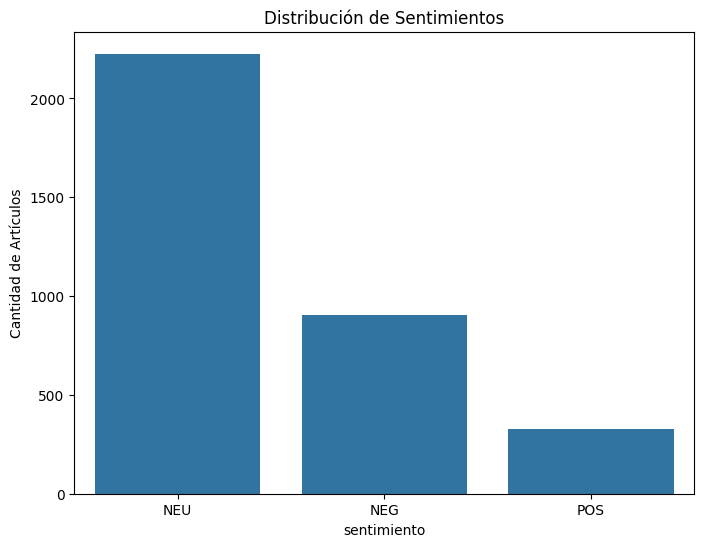

In [202]:
# Distribución de sentimientos
sentiment_counts = df['sentimiento'].value_counts()

plt.figure(figsize=(8,6))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values)
plt.title('Distribución de Sentimientos')
plt.ylabel('Cantidad de Artículos')
plt.show()

In [203]:
sentiment_counts

sentimiento
NEU    2226
NEG     906
POS     328
Name: count, dtype: int64

In [204]:
# Distribución de sentimientos
sent_voz = la_voz_del_sur['sentimiento'].value_counts()
sent_voz

sentimiento
NEU    549
NEG    326
POS    181
Name: count, dtype: int64

In [205]:
# Distribución de sentimientos
sent_letra = letra_fria['sentimiento'].value_counts()
sent_letra

sentimiento
NEU    464
NEG     76
POS     62
Name: count, dtype: int64

In [206]:
# Distribución de sentimientos
sent_calor = al_calor_politico['sentimiento'].value_counts()
sent_calor

sentimiento
NEU    944
NEG    324
POS     76
Name: count, dtype: int64

In [207]:
# Distribución de sentimientos
sent_plumas = plumas_libres['sentimiento'].value_counts()
sent_plumas

sentimiento
NEU    269
NEG    180
POS      9
Name: count, dtype: int64

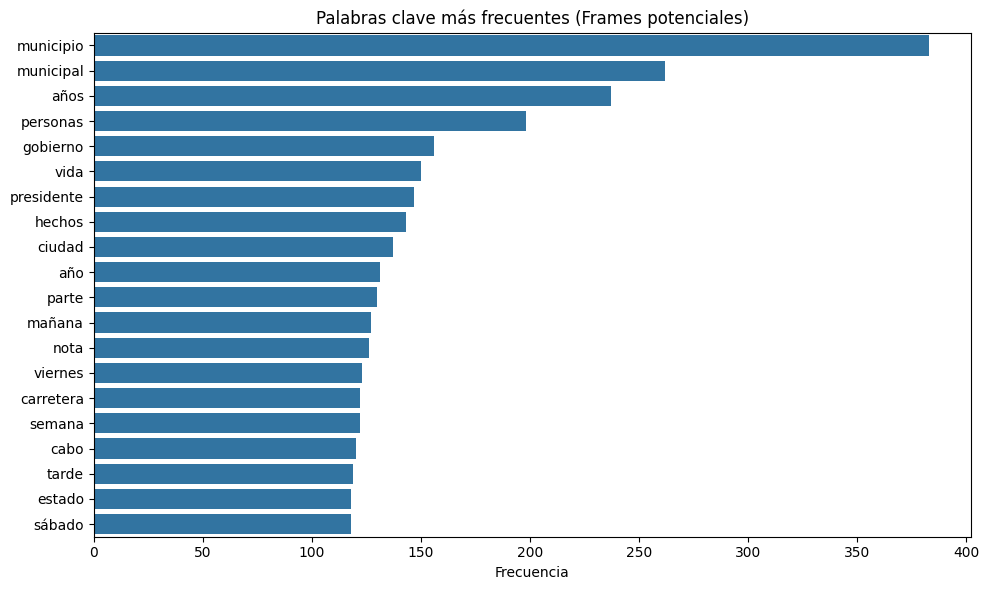

In [208]:
# Análisisde de frames basado en Palabras clave
def extract_keywords(analisis_dict):
    return analisis_dict.get('palabras_clave', [])

df['keywords'] = df['analisis'].apply(extract_keywords)

# Contar frecuencia de palabras clave
all_keywords = [kw for sublist in df['keywords'] for kw in sublist]
keyword_counts = Counter(all_keywords).most_common(20)

# Visualizar
plt.figure(figsize=(10,6))
sns.barplot(x=[count[1] for count in keyword_counts], 
            y=[count[0] for count in keyword_counts])
plt.title("Palabras clave más frecuentes (Frames potenciales)")
plt.xlabel("Frecuencia")
plt.tight_layout()
plt.show()

In [209]:
keyword_counts

[('municipio', 383),
 ('municipal', 262),
 ('años', 237),
 ('personas', 198),
 ('gobierno', 156),
 ('vida', 150),
 ('presidente', 147),
 ('hechos', 143),
 ('ciudad', 137),
 ('año', 131),
 ('parte', 130),
 ('mañana', 127),
 ('nota', 126),
 ('viernes', 123),
 ('carretera', 122),
 ('semana', 122),
 ('cabo', 120),
 ('tarde', 119),
 ('estado', 118),
 ('sábado', 118)]

In [210]:
#keyword_counts.to_csv('keyword_counts.csv', index=False, encoding='utf-8-sig')

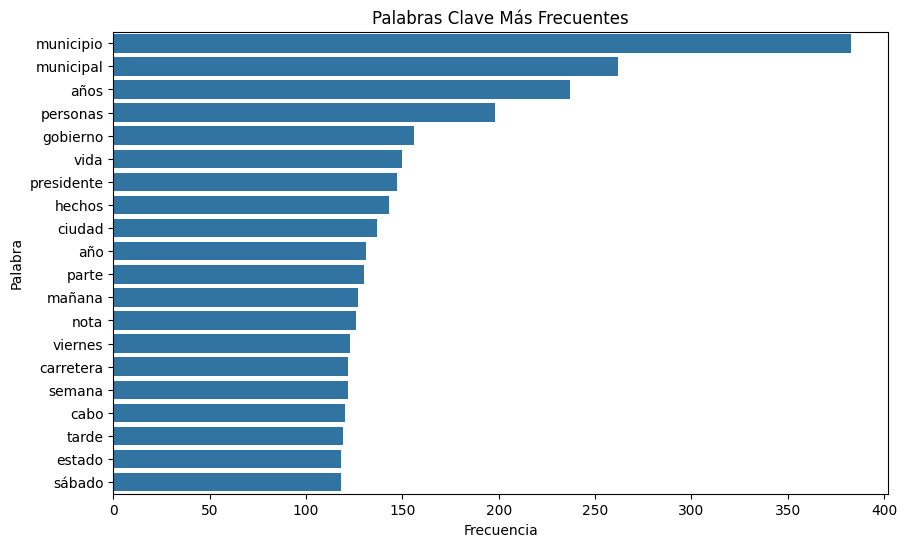

In [211]:
# Identificar temas principales a través de palabras clave
all_keywords = [kw for sublist in df['palabras_clave'] for kw in sublist]
keyword_counts = Counter(all_keywords).most_common(20)

# Visualización
keywords_df = pd.DataFrame(keyword_counts, columns=['Palabra', 'Frecuencia'])
plt.figure(figsize=(10,6))
sns.barplot(data=keywords_df, y='Palabra', x='Frecuencia')
plt.title('Palabras Clave Más Frecuentes')
plt.show()

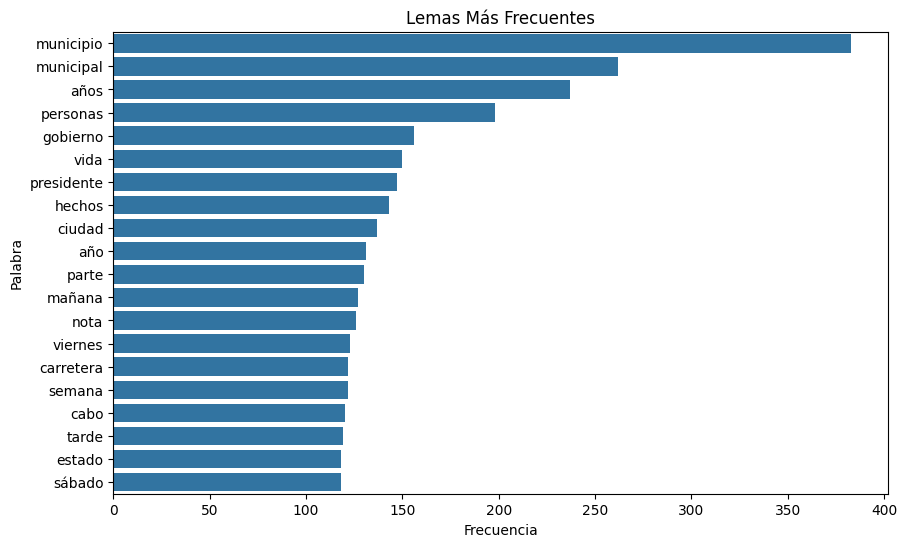

In [231]:
# Identificar temas principales a través de palabras clave
all_lemas = [kw for sublist in df['lemas'] for kw in sublist]
keyword_counts = Counter(all_keywords).most_common(20)

# Visualización
lemas_df = pd.DataFrame(keyword_counts, columns=['Palabra', 'Frecuencia'])
plt.figure(figsize=(10,6))
sns.barplot(data=lemas_df, y='Palabra', x='Frecuencia')
plt.title('Lemas Más Frecuentes')
plt.show()

In [222]:
# Definir términos relacionados con derechos humanos y seguridad
derechos_humanos_terms = {'derechos', 'humanos', 'violencia', 'víctimas', 'justicia', 
                         'desaparecidos', 'protección', 'derecho', 'humano', 'violación'}
seguridad_terms = {'seguridad', 'delito', 'crimen', 'policía', 'narco', 'violencia',
                  'organizado', 'cártel', 'inseguridad', 'homicidio'}

# Función para identificar artículos sobre un tema
def identify_articles(terms, lemas_list):
    return any(lemma in terms for lemma in lemas_list)

# Aplicar a cada artículo
df['es_derechos_humanos'] = df['lemas'].apply(lambda x: identify_articles(derechos_humanos_terms, x))
df['es_seguridad'] = df['lemas'].apply(lambda x: identify_articles(seguridad_terms, x))

# Resultados
#dh_count = df['es_derechos_humanos'].sum()
#seg_count = df['es_seguridad'].sum()

#print(f"Artículos sobre derechos humanos: {dh_count}")
#print(f"Artículos sobre seguridad: {seg_count}")

In [227]:
# Resultados
dh_count = df['es_derechos_humanos'].sum()
seg_count = df['es_seguridad'].sum()
print(f"Artículos sobre derechos humanos: {dh_count}")
print(f"Artículos sobre seguridad: {seg_count}")

Artículos sobre derechos humanos: 118
Artículos sobre seguridad: 193


Total artículos sobre derechos humanos: 118
Total artículos sobre seguridad: 193

Resultados por medio:


,medio,total_articulos,derechos_humanos,seguridad,% DH,% Seguridad
0,Al Calor Político,1344,61,99,4.538690,7.366071
1,La Voz del Sur,1056,27,51,2.556818,4.829545
2,Letra Fría,602,10,18,1.661130,2.990033
3,Plumas Libres,458,20,25,4.366812,5.458515



Artículos que tratan ambos temas: 54


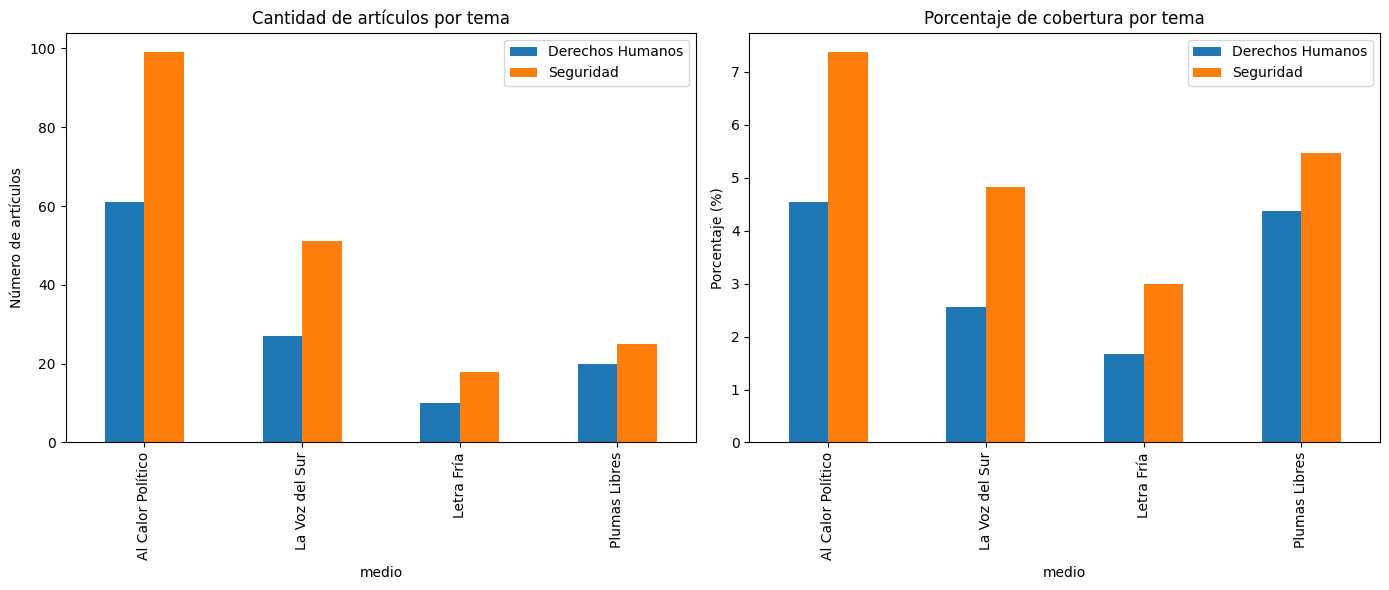


Ejemplos de artículos sobre derechos humanos:


,medio,titulo
8,La Voz del Sur,Gobierno Municipal Continúa con el Apoyo a las...
63,La Voz del Sur,Punto por Punto – La Violencia de Teuchitlán E...
68,La Voz del Sur,Capturan a Despreciable Sujeto que Abusó de un...
90,La Voz del Sur,La Seguridad en el Sur de Jalisco
174,La Voz del Sur,"Cámaras de Seguridad, Cuando Sancionan a Quien..."



Ejemplos de artículos sobre seguridad:


,medio,titulo
0,La Voz del Sur,Dan Banderazo de Arranque al Operativo de Sema...
7,La Voz del Sur,Hombre Pierde la Vida al ser Baleado en un Dom...
63,La Voz del Sur,Punto por Punto – La Violencia de Teuchitlán E...
79,La Voz del Sur,Policías de Zapotlán el Grande Frustran Secues...
90,La Voz del Sur,La Seguridad en el Sur de Jalisco


In [230]:
# Definir términos relacionados con derechos humanos y seguridad
derechos_humanos_terms = {'derechos', 'humanos', 'violencia', 'víctimas', 'justicia', 
                         'desaparecidos', 'protección', 'derecho', 'humano', 'violación'}
seguridad_terms = {'seguridad', 'delito', 'crimen', 'policía', 'narco', 'violencia',
                  'organizado', 'cártel', 'inseguridad', 'homicidio'}

# Extraer lemas de la columna 'analisis' si no existe 'lemas'
if 'lemas' not in df.columns:
    df['lemas'] = df['analisis'].apply(lambda x: x.get('lemas', []))

# Función para identificar artículos sobre un tema
def identify_articles(terms, lemas_list):
    return any(lemma in terms for lemma in lemas_list)

# Aplicar a cada artículo
df['es_derechos_humanos'] = df['lemas'].apply(lambda x: identify_articles(derechos_humanos_terms, x))
df['es_seguridad'] = df['lemas'].apply(lambda x: identify_articles(seguridad_terms, x))

# 1. Resultados generales
total_dh = df['es_derechos_humanos'].sum()
total_seg = df['es_seguridad'].sum()
print(f"Total artículos sobre derechos humanos: {total_dh}")
print(f"Total artículos sobre seguridad: {total_seg}\n")

# 2. Resultados por medio
resultados_por_medio = df.groupby('medio').agg(
    total_articulos=('medio', 'size'),
    derechos_humanos=('es_derechos_humanos', 'sum'),
    seguridad=('es_seguridad', 'sum')
).reset_index()

# Calcular porcentajes
resultados_por_medio['% DH'] = (resultados_por_medio['derechos_humanos'] / resultados_por_medio['total_articulos']) * 100
resultados_por_medio['% Seguridad'] = (resultados_por_medio['seguridad'] / resultados_por_medio['total_articulos']) * 100

print("Resultados por medio:")
display(resultados_por_medio)

# 3. Análisis de coincidencia (artículos que tratan ambos temas)
df['ambos_temas'] = df['es_derechos_humanos'] & df['es_seguridad']
coincidencia = df['ambos_temas'].sum()
print(f"\nArtículos que tratan ambos temas: {coincidencia}")

# 4. Visualización
import matplotlib.pyplot as plt

# Configurar el gráfico
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Gráfico 1: Cantidad absoluta
resultados_por_medio[['medio', 'derechos_humanos', 'seguridad']].set_index('medio').plot(
    kind='bar', ax=ax1, color=['#1f77b4', '#ff7f0e'])
ax1.set_title('Cantidad de artículos por tema')
ax1.set_ylabel('Número de artículos')
ax1.legend(['Derechos Humanos', 'Seguridad'])

# Gráfico 2: Porcentajes
resultados_por_medio[['medio', '% DH', '% Seguridad']].set_index('medio').plot(
    kind='bar', ax=ax2, color=['#1f77b4', '#ff7f0e'])
ax2.set_title('Porcentaje de cobertura por tema')
ax2.set_ylabel('Porcentaje (%)')
ax2.legend(['Derechos Humanos', 'Seguridad'])

plt.tight_layout()
plt.show()

# 5. Opcional: Mostrar algunos ejemplos
print("\nEjemplos de artículos sobre derechos humanos:")
display(df[df['es_derechos_humanos']][['medio', 'titulo']].head(5))

print("\nEjemplos de artículos sobre seguridad:")
display(df[df['es_seguridad']][['medio', 'titulo']].head(5))

/tmp/ipykernel_8305/3602320805.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dh_articles[frame] = dh_articles['lemas'].apply(lambda x: any(lemma in terms for lemma in x))
/tmp/ipykernel_8305/3602320805.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dh_articles[frame] = dh_articles['lemas'].apply(lambda x: any(lemma in terms for lemma in x))
/tmp/ipykernel_8305/3602320805.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer

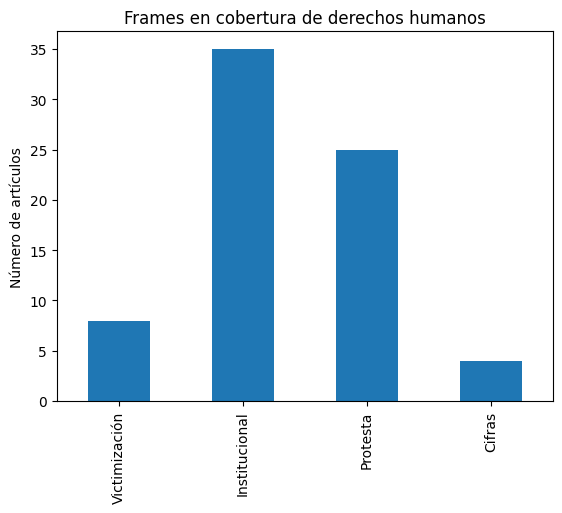

In [237]:
## Análisis de frames en cobertura de Derechos Humanos
# Filtrar artículos sobre derechos humanos
dh_articles = df[df['es_derechos_humanos']]

# Identificar frames comunes
dh_frames = {
    'Victimización': {'víctima', 'familia', 'dolor', 'sufrimiento'},
    'Institucional': {'gobierno', 'autoridad', 'ley', 'fiscalía', 'justicia'},
    'Protesta': {'marcha', 'manifestación', 'protesta', 'exigir', 'justicia'},
    'Cifras': {'número', 'estadística', 'aumento', 'porcentaje', 'crecimiento'}
}

# Identificar presencia de frames
for frame, terms in dh_frames.items():
    dh_articles[frame] = dh_articles['lemas'].apply(lambda x: any(lemma in terms for lemma in x))

# Resumen de frames
frame_counts = dh_articles[list(dh_frames.keys())].sum()
frame_counts.plot(kind='bar', title='Frames en cobertura de derechos humanos')
plt.ylabel('Número de artículos')
plt.show()

/tmp/ipykernel_8305/1339781021.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=[count[1] for count in entity_counts],


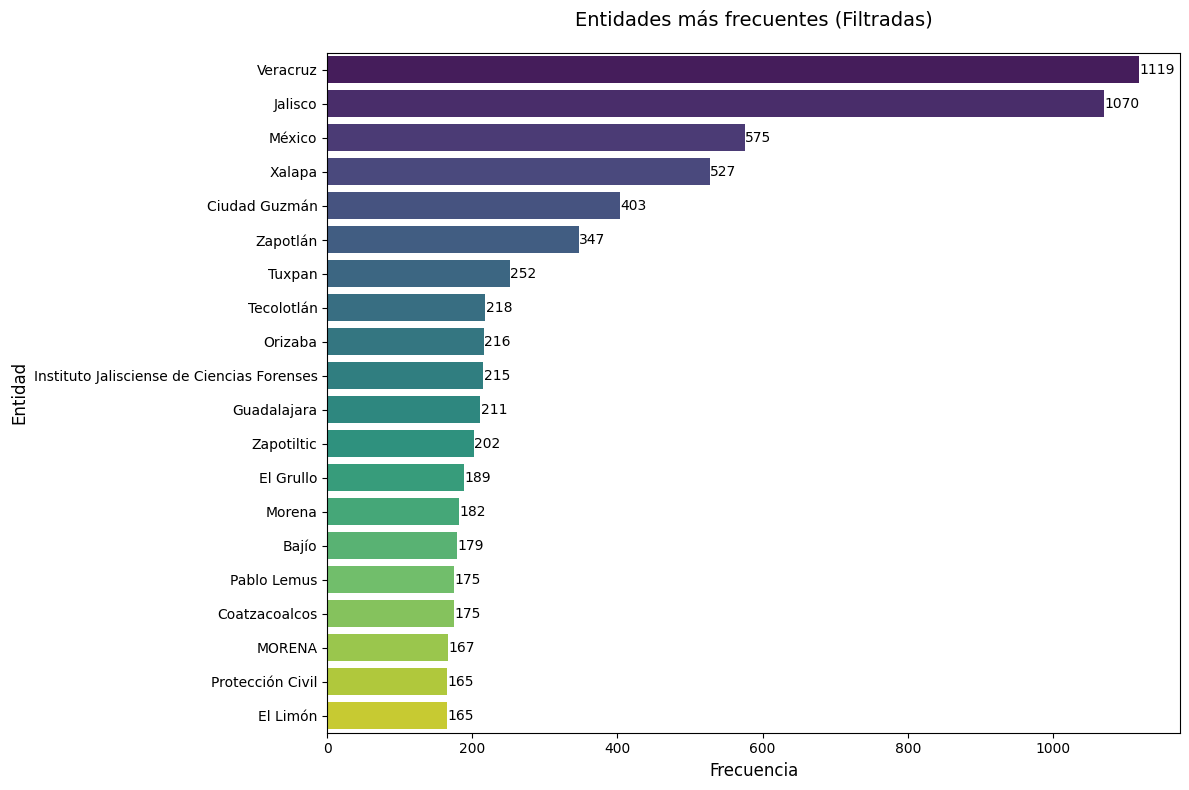

In [234]:


def extract_entities(analisis_dict):
    # Lista de stopwords a excluir (puedes añadir más)
    stopwords_especificas = {
        "fin area", "fin texto", "es).-", "es)", "fin", "area", "texto",
        "misc", "loc", "org", "per"  # Filtra también posibles etiquetas de tipo de entidad
    }
    
    # Extraer entidades y filtrar
    entities = []
    for ent in analisis_dict.get('entidades', []):
        if isinstance(ent, (list, tuple)) and len(ent) > 0:
            entity_text = ent[0].strip().lower()  # Limpiar y normalizar
            # Excluir stopwords y entidades muy cortas o no informativas
            if (entity_text not in stopwords_especificas and
                len(entity_text) > 3 and  # Excluir palabras muy cortas
                not entity_text.replace('-', '').replace('.', '').isnumeric()):  # Excluir números
                entities.append(ent[0])  # Mantener el formato original
    
    return entities

# Aplicar la función mejorada
df['entities'] = df['analisis'].apply(extract_entities)

# Contar frecuencia de entidades (con filtrado adicional)
all_entities = [ent for sublist in df['entities'] for ent in sublist 
                if isinstance(ent, str) and len(ent.strip()) > 0]

# Filtrado final para asegurar que no pasaron stopwords
final_filter = {"fin area", "fin texto", "es).-", "es)", "fin", "area", "texto"}
all_entities_filtered = [ent for ent in all_entities 
                         if ent.lower().strip() not in final_filter]

entity_counts = Counter(all_entities_filtered).most_common(20)

# Visualización mejorada
plt.figure(figsize=(12, 8))  # Tamaño más grande
ax = sns.barplot(x=[count[1] for count in entity_counts], 
                 y=[count[0] for count in entity_counts],
                 palette="viridis")  # Mejor paleta de colores

plt.title("Entidades más frecuentes (Filtradas)", fontsize=14, pad=20)
plt.xlabel("Frecuencia", fontsize=12)
plt.ylabel("Entidad", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Añadir valores en las barras
for i, v in enumerate([count[1] for count in entity_counts]):
    ax.text(v + 0.5, i, str(v), color='black', ha='left', va='center')

plt.tight_layout()
plt.show()

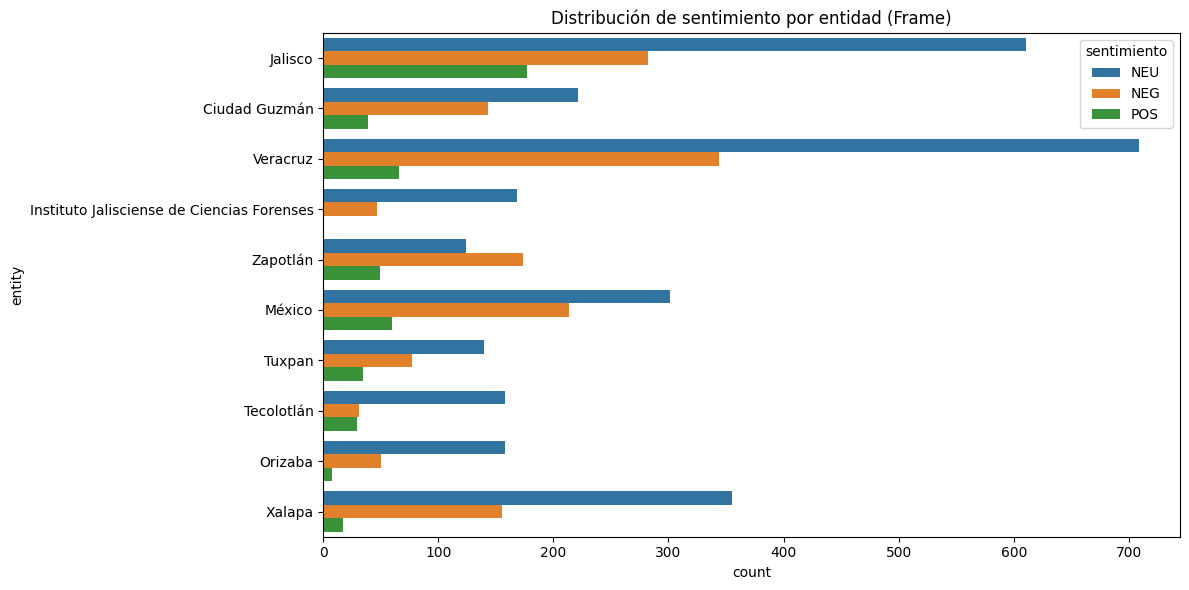

In [235]:
# Análisis de sentimiento por frame
# Crear un dataframe expandido con una fila por entidad
entity_rows = []
for idx, row in df.iterrows():
    for entity in row['entities']:
        entity_rows.append({
            'entity': entity,
            'sentimiento': row['sentimiento'],
            'titulo': row['titulo']
        })
entity_df = pd.DataFrame(entity_rows)

# Analizar distribución de sentimiento por entidad
top_entities = [ent[0] for ent in entity_counts[:10]]
filtered_df = entity_df[entity_df['entity'].isin(top_entities)]

plt.figure(figsize=(12,6))
sns.countplot(data=filtered_df, y='entity', hue='sentimiento')
plt.title("Distribución de sentimiento por entidad (Frame)")
plt.tight_layout()
plt.show()

In [ ]:
entity_df

,entity,sentimiento,titulo
0,UEPCBJ,NEU,Dan Banderazo de Arranque al Operativo de Sema...
1,Puesto de Comando Central,NEU,Dan Banderazo de Arranque al Operativo de Sema...
2,Jalisco,NEU,Dan Banderazo de Arranque al Operativo de Sema...
3,Gobierno del Estado,NEU,Dan Banderazo de Arranque al Operativo de Sema...
4,Operativo Interinstitucional,NEU,Dan Banderazo de Arranque al Operativo de Sema...
...,...,...,...
71820,Coparmex,NaN,Coparmex dice no estar de acuerdo que gobierno...
71821,López Obrador,NaN,Coparmex dice no estar de acuerdo que gobierno...
71822,Realmente,NaN,Coparmex dice no estar de acuerdo que gobierno...
71823,López Obrador,NaN,Coparmex dice no estar de acuerdo que gobierno...


In [ ]:
entity_df.to_csv('sentimientos_por_entidad.csv', index=False, encoding='utf-8-sig')

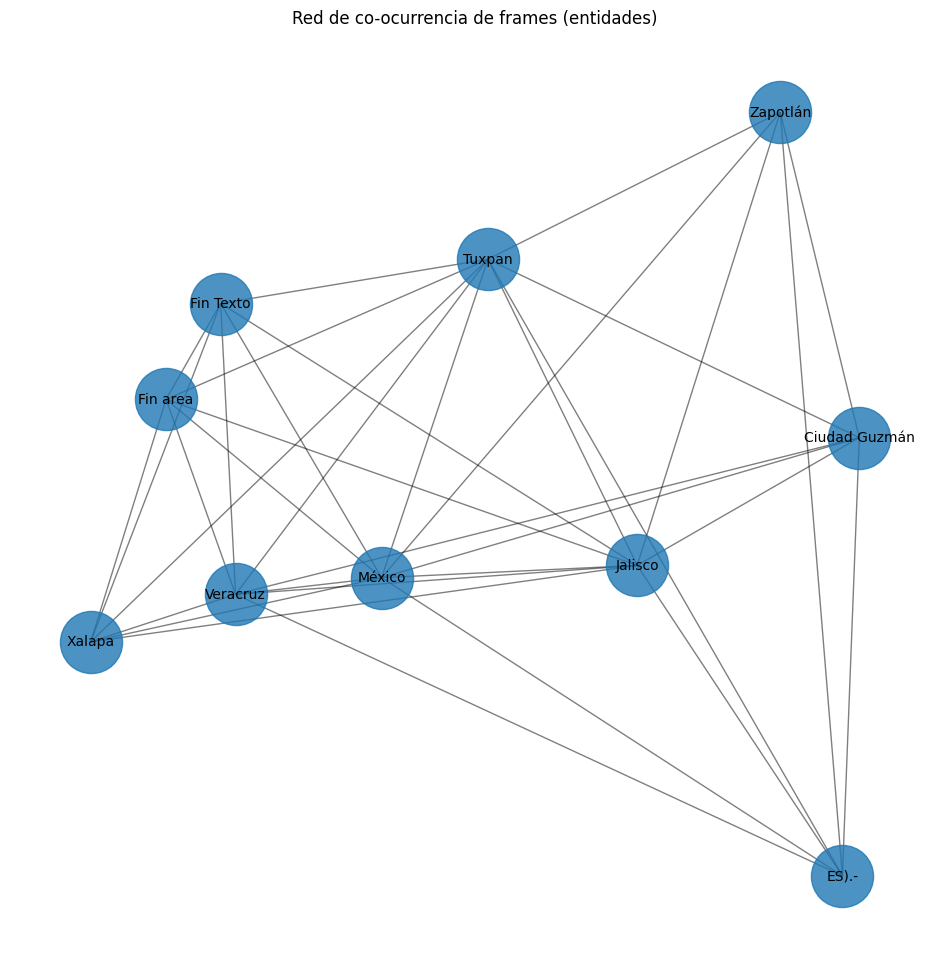

In [ ]:
# Análisis de redes semánticas
import networkx as nx

# Crear co-ocurrencia de entidades
co_occur = pd.DataFrame(index=top_entities, columns=top_entities, data=0)

for entities in df['entities']:
    for i in range(len(entities)):
        for j in range(i+1, len(entities)):
            if entities[i] in top_entities and entities[j] in top_entities:
                co_occur.loc[entities[i], entities[j]] += 1
                co_occur.loc[entities[j], entities[i]] += 1

# Crear gráfico de red
G = nx.Graph()
for entity in top_entities:
    G.add_node(entity)
    
for i in range(len(top_entities)):
    for j in range(i+1, len(top_entities)):
        if co_occur.iloc[i,j] > 0:
            G.add_edge(top_entities[i], top_entities[j], weight=co_occur.iloc[i,j])

# Dibujar red
plt.figure(figsize=(12,12))
pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G, pos, node_size=2000, alpha=0.8)
nx.draw_networkx_edges(G, pos, width=1.0, alpha=0.5)
nx.draw_networkx_labels(G, pos, font_size=10)
plt.title("Red de co-ocurrencia de frames (entidades)")
plt.axis('off')
plt.show()

In [ ]:
# Análisis diacrónico de frames para ver cómo evolucionan en el tiempo
# Convertir fecha a datetime (asumiendo que existe una columna fecha)
df['fecha'] = pd.to_datetime(df['fecha'])

# Extraer mes y año
df['mes_año'] = df['fecha'].dt.to_period('M')

# Contar frames por periodo temporal
frames_over_time = df.explode('entities').groupby(['mes_año', 'entities'])['titulo'].count().unstack().fillna(0)

# Visualizar frames más importantes
top_frames = frames_over_time.sum().sort_values(ascending=False).head(5).index
frames_over_time[top_frames].plot(figsize=(12,6))
plt.title("Evolución temporal de frames principales")
plt.ylabel("Frecuencia")
plt.xlabel("Tiempo")
plt.tight_layout()
plt.show()

/tmp/ipykernel_1253/4254586063.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['fecha'] = pd.to_datetime(df['fecha'])


DateParseError: Unknown datetime string format, unable to parse: abril 12th, 2025, at position 0

In [ ]:
# Análisis comparativo entre medios
# Asumiendo que tienes una columna 'medio' que identifica cada fuente
# Si no, necesitarías combinar tus 4 bases de datos primero

def compare_frames_across_media(df, frame_type='entities'):
    if frame_type == 'entities':
        extract_func = extract_entities
    else:
        extract_func = extract_keywords
    
    comparison = df.explode(frame_type).groupby(['medio', frame_type]).size().unstack().fillna(0)
    
    # Normalizar por número de artículos por medio
    articles_per_medium = df['medio'].value_counts()
    comparison = comparison.div(articles_per_medium, axis=0)
    
    # Tomar los 5 frames más distintivos por medio
    top_frames = {}
    for medium in comparison.index:
        top_frames[medium] = comparison.loc[medium].sort_values(ascending=False).head(5).index.tolist()
    
    return top_frames

# Ejemplo de uso (necesitarías tener la columna 'medio')
frame_comparison = compare_frames_across_media(df)
print(frame_comparison)

{'Al Calor Político': ['Fin area', 'Fin Texto', 'Veracruz', 'Xalapa', 'México'], 'La Voz del Sur': ['Jalisco', 'Ciudad Guzmán', 'Zapotlán', 'ES).-', 'Instituto Jalisciense de Ciencias Forenses'], 'Letra Fría': ['Jalisco', 'Tecolotlán', 'El Grullo', 'El Limón', 'Cihuatlán'], 'Plumas Libres': ['Veracruz', 'Xalapa', 'México', 'Orizaba', 'Ver.-']}


In [ ]:
frame_comparison

{'Al Calor Político': ['Fin area',
  'Fin Texto',
  'Veracruz',
  'Xalapa',
  'México'],
 'La Voz del Sur': ['Jalisco',
  'Ciudad Guzmán',
  'Zapotlán',
  'ES).-',
  'Instituto Jalisciense de Ciencias Forenses'],
 'Letra Fría': ['Jalisco', 'Tecolotlán', 'El Grullo', 'El Limón', 'Cihuatlán'],
 'Plumas Libres': ['Veracruz', 'Xalapa', 'México', 'Orizaba', 'Ver.-']}

In [ ]:
frame_comparison.to_csv('frame_comparison.csv', index=False, encoding='utf-8-sig')

AttributeError: 'dict' object has no attribute 'to_csv'